In [1]:
from datascience import *
import numpy as np
%matplotlib inline

# Getting some data
---

I found this online as an Excel file.  We have it as a csv named `fortnite-games-data.csv`, but we need to read that to a Table!

In [2]:
# Some code to read the csv
fortnite = Table.read_table("fortnite-games-data.csv")

I'd really like to be able to see what we've got.  I only want to see the first 5 rows though, just to check it out.

In [3]:
# Some code to display just the first 5 rows
fortnite.show(5)

Match,Date,Time of Day,Solo,Placed,Eliminations,Assists,Revives,Accuracy,Hits,Head Shots,Distance Traveled,Materials Gathered,Materials Used,Damage Taken,Damage to Players,Damage to Structures
0,2018-04-10,18:00:00,True,27,2,0,0,0.23,14,2,271.08,20,20,272,331,621
1,2018-04-10,18:00:00,True,45,1,2,0,0.3,19,1,396.73,123,30,247,444,998
2,2018-04-10,18:00:00,True,38,3,0,0,0.3,32,1,607.8,71,60,176,322,1109
3,2018-04-10,19:00:00,True,30,1,3,0,0.18,19,1,714.16,244,10,238,330,4726
4,2018-04-10,19:00:00,False,16,3,1,1,0.58,42,18,1140,584,150,365,668,2070


# That's a lot of data... what does it all mean?
---
It's generally a good idea to understand what we're working with.

Let's briefly describe what each column means.  If we have anyone in the room with \*ahem\* some domain knowledge in this field, that could help!

In [ ]:
# Solo is whether they were solo vs with a squad
# Placed is how close to winning (#1) they were -- how many people left alive when they died
# Max placement is out of 100 for solo, out of 25 for squads

# Add a max placement column
---

In solo matches, placement can be from 1 to 100, but in squad matches it only goes to 25.

We can use some array math to add a `Max Placement` column to our table!

In [4]:
np.array([4, True])

array([4, 1])

In [5]:
# Code to make a max_placement array

# True => 100
# False => 25
solo = fortnite.column("Solo")

max_placement = 25 + solo * 75

# Code to add this as a column
fortnite = fortnite.with_column("Max Placement", max_placement)
fortnite.show(5)

Match,Date,Time of Day,Solo,Placed,Eliminations,Assists,Revives,Accuracy,Hits,Head Shots,Distance Traveled,Materials Gathered,Materials Used,Damage Taken,Damage to Players,Damage to Structures,Max Placement
0,2018-04-10,18:00:00,True,27,2,0,0,0.23,14,2,271.08,20,20,272,331,621,100
1,2018-04-10,18:00:00,True,45,1,2,0,0.3,19,1,396.73,123,30,247,444,998,100
2,2018-04-10,18:00:00,True,38,3,0,0,0.3,32,1,607.8,71,60,176,322,1109,100
3,2018-04-10,19:00:00,True,30,1,3,0,0.18,19,1,714.16,244,10,238,330,4726,100
4,2018-04-10,19:00:00,False,16,3,1,1,0.58,42,18,1140,584,150,365,668,2070,25


# Let's answer some questions
---

- What is this player's average placement?
- How many eliminations does this player have in total? Average per match?
- How many eliminations did this player get solo versus in a squad? Average per each category?
- What percentage of matches did this player get less than 2 eliminations?
- What were this player's best games?
- What is the average eliminations in this player's top 5 games? Top 10?
- Is the match where this player placed the best the same as the match with the most eliminations?
- Did this player's performance change as they played more games?

BONUS:
- What match has the greatest sum of Eliminations, Assists, and Revives?

# Still a lot of data... can we change that?
---
Looks fun!  But where do we start?  We still have a lot of data and it's a bit confusing to look at all of it.  I have a feeling we don't need all of the columns to answer the questions above.

There are two ways we can approach this.
1. We can copy the table **without** the columns we **don't want** into a new table
2. We can copy the table **with** the columns we **do want** into a new table

Which do you think is easiest?

In [6]:
# Some code to obtain a new table with only relevant columns
# We probably want to look at Match, Solo, Placed, Max Placement, and Eliminations
# fort = fortnite.drop(...)
fort = fortnite.select(["Match", "Solo", "Placed", "Max Placement", "Eliminations"])
fort.show(5)

Match,Solo,Placed,Max Placement,Eliminations
0,True,27,100,2
1,True,45,100,1
2,True,38,100,3
3,True,30,100,1
4,False,16,25,3


# Finding the average placement
---

In [7]:
# Average Placement
sum(fort.column("Placed")) / fort.num_rows

22.04597701149425

In [9]:
# Is this helpful though?
# We should create a new column, Rank, that consists of placement / max placement
fort = fort.with_column(
    "Rank", fort.column("Placed") / fort.column("Max Placement")
)
fort.show(5)

Match,Solo,Placed,Max Placement,Eliminations,Rank
0,True,27,100,2,0.27
1,True,45,100,1,0.45
2,True,38,100,3,0.38
3,True,30,100,1,0.3
4,False,16,25,3,0.64


In [10]:
# Now let's try that again
# This time find Average Rank
np.mean(fort.column("Rank"))

0.44563218390804593

# How many Eliminations?
---

Let's find the total number and average number of Eliminations for this player.

Does this differ between solo matches and squad matches?

In [ ]:
# Total Elims
...

In [11]:
# Average Elims
np.mean(fort.column("Eliminations"))

2.5172413793103448

In [13]:
# Hold on again, is the average useful?  When in a squad, the number of eliminations
# doesn't correspond to a elim-death ratio.
# Let's just look at solo kills.


# The basic structure to find this info could look something like this:
# ____(fort.where(_____, are.equal_to(____))____)
np.mean(fort.where("Solo", are.equal_to(1)).column("Eliminations"))

2.1136363636363638

In [15]:
# Can we simplify that at all?
np.mean(fort.where("Solo", True).column("Eliminations")) # These are all the same
np.mean(fort.where("Solo").column("Eliminations"))

2.1136363636363638

In [16]:
# Average Elims Solo vs Squad
avg_elims_solo = np.mean(fort.where("Solo").column("Eliminations")) # We just did this!
avg_elims_squad = np.mean(fort.where("Solo", False).column("Eliminations")) # One small change
print("Solo:", avg_elims_solo, "| Squad:", avg_elims_squad)

Solo: 2.1136363636363638 | Squad: 2.9302325581395348


# Less than two Eliminations :(
---

I wonder the proportion of matches where this player got less than 2 eliminations.  We can use a new "are" predicate for this...

[Datascience documentation on the "are" predicates.](http://data8.org/datascience/predicates.html)

In [18]:
# What proportion of matches did this player get less than 2 eliminations?
fort.where("Eliminations", are.below(1)).num_rows / fort.num_rows

0.08045977011494253

# Those sucked, what are some of the good games?
---

In [21]:
# Best Games (Placed)
# You can use the sort method for this
fort.sort("Placed").show()

Match,Solo,Placed,Max Placement,Eliminations,Rank
20,False,1,25,7,0.04
38,False,1,25,6,0.04
74,True,1,100,4,0.01
30,False,2,25,8,0.08
41,False,2,25,6,0.08
82,True,2,100,8,0.02
15,False,4,25,5,0.16
53,False,4,25,5,0.16
79,False,4,25,5,0.16
16,False,5,25,3,0.2


In [22]:
# What about this? (Rank)
fort.sort("Rank")

Match,Solo,Placed,Max Placement,Eliminations,Rank
74,True,1,100,4,0.01
82,True,2,100,8,0.02
20,False,1,25,7,0.04
38,False,1,25,6,0.04
28,True,8,100,6,0.08
30,False,2,25,8,0.08
41,False,2,25,6,0.08
46,True,11,100,2,0.11
37,True,13,100,6,0.13
68,True,13,100,6,0.13


In [23]:
# Maybe it looks weird here, but it'll make sense when we look 
# at the end of the table

# How do we look at the other end?
fort.sort("Rank", descending=True)

Match,Solo,Placed,Max Placement,Eliminations,Rank
71,False,25,25,2,1
62,False,25,25,2,1
51,False,25,25,2,1
45,False,25,25,1,1
83,False,24,25,4,0.96
80,False,24,25,1,0.96
58,False,24,25,2,0.96
56,False,24,25,2,0.96
9,False,24,25,1,0.96
64,False,23,25,1,0.92


# Playing around with averages
---

Let's find out the average number of Eliminations in this player's top 5 ranked games, and compare that to their top 10 ranked games.

In [25]:
# Avg in top 5, top 10
top5 = fort.sort("Rank").take(np.arange(5))
top10 = fort.sort("Rank").take(np.arange(40))

print("Top 5:", np.mean(top5.column("Eliminations")),
      "| Top 10:", np.mean(top10.column("Eliminations")))

Top 5: 6.2 | Top 10: 3.3


# Is the best game the game with the highest Eliminations?
---

In [30]:
# Are [best ranked matches] the same as [highest elimination matches]?
fort.where("Rank", min(fort.column("Rank")))

Match,Solo,Placed,Max Placement,Eliminations,Rank
74,True,1,100,4,0.01


In [ ]:
fort.sort("Rank").take(np.arange(5)) # What if this player placed 1/100 six times?

In [27]:
fort.sort("Eliminations", descending=True).take(np.arange(5))

Match,Solo,Placed,Max Placement,Eliminations,Rank
82,True,2,100,8,0.02
30,False,2,25,8,0.08
20,False,1,25,7,0.04
69,False,5,25,6,0.2
68,True,13,100,6,0.13


# Did this player improve as they played more?
---

It would be easiest to create a visualization for this...

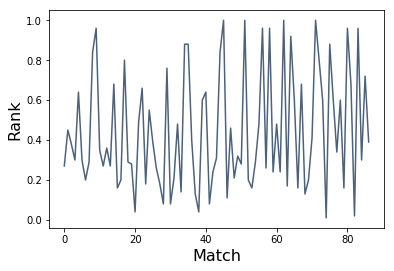

In [31]:
# Performance versus match number
fort.plot("Match", "Rank")

# BONUS ROUND
---

What match did this played have the most Eliminations, Assists, and Revives combined?

Looking at their best match above, are they the same match?

In [32]:
# BONUS ROUND!
# What are the matches with max Eliminations + Assists + Revives?

# We're going to need to add some more columns again.
# Namely, add Assists and Revives
fort_more = fort.with_columns([
    "Assists", fortnite.column("Assists"),
    "Revives", fortnite.column("Revives")
])

fort_more.show(5)

Match,Solo,Placed,Max Placement,Eliminations,Rank,Assists,Revives
0,True,27,100,2,0.27,0,0
1,True,45,100,1,0.45,2,0
2,True,38,100,3,0.38,0,0
3,True,30,100,1,0.3,3,0
4,False,16,25,3,0.64,1,1


In [33]:
# we should add a column for the sum of these scores
fort_more = fort_more.with_column("Score",
                                 fort_more.column("Eliminations") + fort_more.column("Assists") + fort_more.column("Revives")
                                 )
fort_more.show(5)

Match,Solo,Placed,Max Placement,Eliminations,Rank,Assists,Revives,Score
0,True,27,100,2,0.27,0,0,2
1,True,45,100,1,0.45,2,0,3
2,True,38,100,3,0.38,0,0,3
3,True,30,100,1,0.3,3,0,4
4,False,16,25,3,0.64,1,1,5


In [34]:
# We should know how to get the row with the highest score, but let's try it a different way
fort_more.where("Score", max(fort_more.column("Score")))

Match,Solo,Placed,Max Placement,Eliminations,Rank,Assists,Revives,Score
15,False,4,25,5,0.16,4,4,13


In [37]:
fort_more.sort("Rank").show(20)

Match,Solo,Placed,Max Placement,Eliminations,Rank,Assists,Revives,Score
74,True,1,100,4,0.01,5,0,9
82,True,2,100,8,0.02,2,0,10
20,False,1,25,7,0.04,0,0,7
38,False,1,25,6,0.04,3,1,10
28,True,8,100,6,0.08,2,0,8
30,False,2,25,8,0.08,0,1,9
41,False,2,25,6,0.08,2,0,8
46,True,11,100,2,0.11,1,0,3
37,True,13,100,6,0.13,0,0,6
68,True,13,100,6,0.13,2,0,8
